In [106]:
import pandas as pd
import seaborn as sns


In [107]:
filepath_enc = 'data/encounter-events.csv'
filepath_loit = 'data/loitering-events.csv'
filepath_tran = 'data/transshipment-vessels.csv'

In [108]:
df_enc = pd.read_csv(filepath_enc)
df_loit = pd.read_csv(filepath_loit)
df_tran = pd.read_csv(filepath_tran)

# encounter-events

In [109]:
df_enc.head()  # look at first five instance

,fishing_vessel_mmsi,transshipment_vessel_mmsi,start_time,end_time,mean_latitude,mean_longitude,duration_hr,median_distance_km,median_speed_knots
0,416565000,354240000,2016-11-18T14:30:00Z,2016-11-19T01:50:00Z,-17.039085,-79.063725,11.333333,0.038188,0.585402
1,412679190,354240000,2016-12-11T14:50:00Z,2016-12-11T19:50:00Z,-20.269608,-79.244953,5.000000,0.020033,0.575663
2,440863000,354240000,2017-06-13T12:50:00Z,2017-06-15T01:20:00Z,-62.640767,-60.690240,36.500000,0.054992,0.019775
3,416563000,354240000,2016-11-15T11:30:00Z,2016-11-16T04:00:00Z,-17.046586,-79.061923,16.500000,0.036427,1.023917
4,441309000,354240000,2017-05-19T00:40:00Z,2017-05-19T20:50:00Z,-46.627878,-60.554922,20.166667,0.034053,0.544031


First, we look at general information about the encounter dataset.

In [110]:
df_enc.info()
print('Shape: ', df_enc.shape)  # get shape of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11681 entries, 0 to 11680
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   fishing_vessel_mmsi        11681 non-null  int64  
 1   transshipment_vessel_mmsi  11681 non-null  int64  
 2   start_time                 11681 non-null  object 
 3   end_time                   11681 non-null  object 
 4   mean_latitude              11681 non-null  float64
 5   mean_longitude             11681 non-null  float64
 6   duration_hr                11681 non-null  float64
 7   median_distance_km         11681 non-null  float64
 8   median_speed_knots         11681 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 821.4+ KB
Shape:  (11681, 9)


Now, we want to get some statistical information about the data distribution.

In [111]:
print(df_enc.describe())

       fishing_vessel_mmsi  transshipment_vessel_mmsi  mean_latitude  \
count         1.168100e+04               1.168100e+04   11681.000000   
mean          3.492475e+08               3.643690e+08      28.148186   
std           8.560155e+07               1.150885e+08      39.851397   
min           2.000080e+06               2.106310e+08     -64.419519   
25%           2.738125e+08               2.733859e+08      -8.003784   
50%           3.382500e+08               3.415370e+08      50.804512   
75%           4.160038e+08               4.124402e+08      58.732077   
max           9.990001e+08               7.600002e+08      78.223238   

       mean_longitude   duration_hr  median_distance_km  median_speed_knots  
count    11681.000000  11681.000000        11681.000000        11681.000000  
mean        33.759551     13.256271            0.059049            0.603595  
std        127.808306     27.669774            0.068599            0.566881  
min       -179.988139      2.000000    

Just by looking at the standard metrics, it comes to notice that in the attributes duration_hr and median_distance_km the max value seems to be very high compared to 75%-quantile.
Also, the fact that the min value in median_distance_km is 0 is worth investigating

## duration_hr
We draw a boxplot to get a better understanding of the distribution of the duration_hr column

<AxesSubplot:xlabel='duration_hr'>

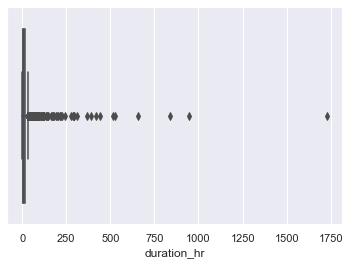

In [112]:
sns.set_theme(style="darkgrid")
sns.boxplot(x=df_enc['duration_hr'])

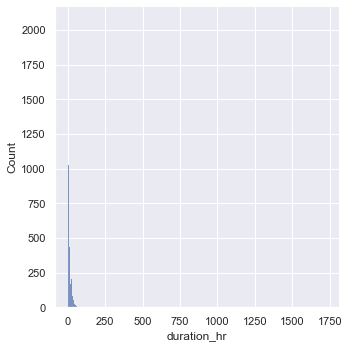

In [113]:
sns.displot(x=df_enc['duration_hr'])

The number of encounterings drop of rapidly with increasing duration. Let's look at how many encounterings lasted longer than 65h.
Note that this value (65h) was chosen to ensure that no more than 1% of encounterings have higher values. The reason for this is that we want to detect outliers. We are lacking the domain knowledge to decide whether these are still plausible transshipments or not.

In [114]:
print('{} encounterings lasted longer than 65 hours'.format(df_enc.loc[df_enc['duration_hr'] > 65].shape[0]))
print('which corresponds to {:.3f}% of the available data'.format(100 * df_enc.loc[df_enc['duration_hr'] > 65].shape[0]/df_enc.shape[0]))

113 encounterings lasted longer than 65 hours
which corresponds to 0.967% of the available data


We are going to remove those entries from the dataset

In [115]:
#df_enc = df_enc.loc[df_enc['duration_hr'] <= 65]
#print('{} encounterings left in the dataset'.format(df_enc.shape[0]))

11681 encounterings left in the dataset


<AxesSubplot:xlabel='duration_hr'>

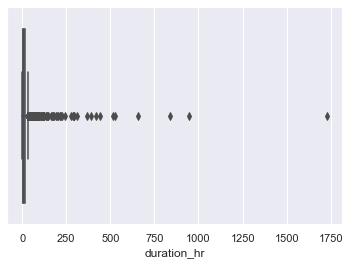

In [116]:
#sns.set_theme(style="darkgrid")
#sns.boxplot(x=df_enc['duration_hr'])

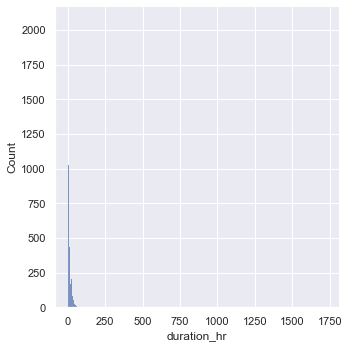

In [117]:
#sns.displot(x=df_enc['duration_hr'])

## median_distance
Now we are going to take a closer look at the distribution of median distance of the encountering vessels

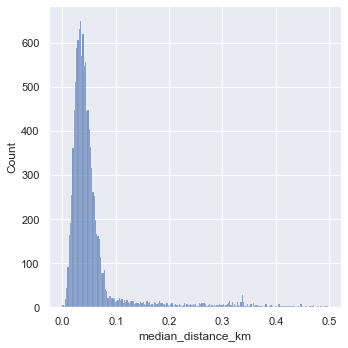

In [118]:
sns.displot(x=df_enc['median_distance_km'])

In [125]:
print('{} encounterings happened under a median distance of 0 km'.format(df_enc.loc[df_enc['median_distance_km'] > 0.2].shape[0]))
print('which corresponds to {:.3f}% of the available data'.format(100 * df_enc.loc[df_enc['median_distance_km'] > 0.2].shape[0]/df_enc.shape[0]))

617 encounterings happened under a median distance of 0 km
which corresponds to 5.282% of the available data


As of now, we are lacking the domain knowledge to decide whether those instances are erroneous or valid.

# loitering-events dataframe metadata

In [120]:
print(df_loit.describe())  # get some insight in the data distribution
print(df_loit.info())  # get some insight about data quality
print('All columns: ', df_loit.columns)  # print column names
print('Shape: ', df_loit.shape)  # get shape of dataframe

       transshipment_mmsi  starting_latitude  starting_longitude  \
count        4.656900e+04       46569.000000        46569.000000   
mean         3.988001e+08          13.332827           37.299625   
std          1.222684e+08          35.386898          109.768020   
min          2.000011e+08         -73.196533         -179.998672   
25%          2.738294e+08         -12.631552          -60.474194   
50%          3.578050e+08           8.495400           32.832062   
75%          5.145650e+08          45.397766          150.625595   
max          8.006687e+08          80.176160          179.995407   

       ending_latitude  ending_longitude  median_speed_knots  \
count     46569.000000      46569.000000        46569.000000   
mean         13.380619         37.359351            1.007226   
std          35.322708        109.733637            0.415658   
min         -87.215640       -179.985580            0.000000   
25%         -12.475266        -60.391735            0.748288   
50%

# transshipment-events dataframe metadata

In [121]:
print(df_tran.describe())  # get some insight in the data distribution
print(df_tran.info())  # get some insight about data quality
print('All columns: ', df_tran.columns)  # print column names
print('Shape: ', df_tran.shape)  # get shape of dataframe

               mmsi           imo
count  1.070000e+03  1.074000e+03
mean   3.956385e+08  8.618462e+06
std    1.330097e+08  6.169946e+05
min    5.004000e+03  5.007510e+06
25%    2.738432e+08  8.225723e+06
50%    3.569255e+08  8.807662e+06
75%    5.141800e+08  9.047266e+06
max    9.927244e+08  9.821134e+06
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1124 entries, 0 to 1123
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mmsi             1070 non-null   float64
 1   shipname         1123 non-null   object 
 2   callsign         1106 non-null   object 
 3   flag             1124 non-null   object 
 4   imo              1074 non-null   float64
 5   first_timestamp  1070 non-null   object 
 6   last_timestamp   1070 non-null   object 
dtypes: float64(2), object(5)
memory usage: 61.6+ KB
None
All columns:  Index(['mmsi', 'shipname', 'callsign', 'flag', 'imo', 'first_timestamp',
       'last_timestamp'],
   